In [1]:
import datetime
from pandas import DataFrame, read_csv, read_table
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import shapely.geometry as shpg
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map

%matplotlib inline
# The commands below are not important
import warnings
warnings.filterwarnings('ignore') 

In [2]:
fdf = '/home/miri/Dokumente/data_peru/wet_data_sel_stat.csv'      # wet Data of selected stations
mdf = '/home/miri/Dokumente/data_peru/metadata_sel_stat_cor.csv'   # metadata of selected stations
fs = '/home/miri/Dokumente/data_peru/riosan_shape/riosan_sel.shp' # shapefile of Rio Santa

In [8]:
# read the shapefile of Rio Santa
shp = salem.read_shapefile(fs)
# transform the shapefile to geopandas
shp = salem.transform_geopandas(shp)
# define google section within meta_df coordinates
gm = GoogleVisibleMap(meta_df.LON, meta_df.LAT)

In [31]:
# Return a geometry containing the union of all geometries
poly = shp.unary_union
# geometries representing all points within a given distance of each geometric object.
poly_buf = poly.buffer(0.25)

In [43]:
# read the data
meta_df = pd.read_csv(mdf, index_col=0)
#meta_df
df = pd.read_csv(fdf, index_col=0, parse_dates=True, dayfirst=True, na_values=-9999.00)

In [46]:
meta_df.index

Index(['154108_RR', '154107_RR', '000445_RR', '000538_RR', '154113_RR',
       '150901_RR', '150903_RR', '150902_RR', '155105_RR', '150904_RR',
       '154110_RR', '000443_RR', '000441_RR', '154111_RR', '000444_RR'],
      dtype='object', name='ID')

In [44]:
meta_df = meta_df.drop('70%',axis=1)
meta_df = meta_df.drop('80%',axis=1)
meta_df = meta_df.drop('90%',axis=1)
meta_df

,LAT,LON,HEIGHT,NAME,VALID%,wet_VALID%,wet_70%,wet_80%,wet_90%,INRIOSAN,INBUF
ID,,,,,,,,,,,
154108_RR,-9.6329,-77.7411,3028.0,CAJAMARQUILL,95.075645,94.678715,True,True,True,False,True
154107_RR,-9.5355,-77.7756,2285.0,CHACCHAN,97.923465,97.601517,True,True,True,False,True
000445_RR,-9.5860,-77.1753,3151.0,CHAVIN,80.295165,79.306113,True,False,False,False,True
000538_RR,-10.1500,-77.1500,3350.0,CHIQUIAN,95.238802,94.901830,True,True,True,False,True
154113_RR,-9.9836,-77.5836,3170.0,COTAPARACO,78.544942,78.168228,True,False,False,False,True
150901_RR,-9.9333,-77.6500,3500.0,MALVAS,91.560368,90.751896,True,True,True,False,True
150903_RR,-10.1578,-77.4322,3351.0,MAYORARCA,78.010976,77.632753,True,False,False,False,True
150902_RR,-9.8833,-77.2333,4400.0,MILPO_1,90.811332,88.933512,True,True,False,True,True
155105_RR,-10.4000,-77.4000,320.0,OCROS,98.353604,97.880411,True,True,True,False,True


KeyError: '[ 282.39084681] not in index'

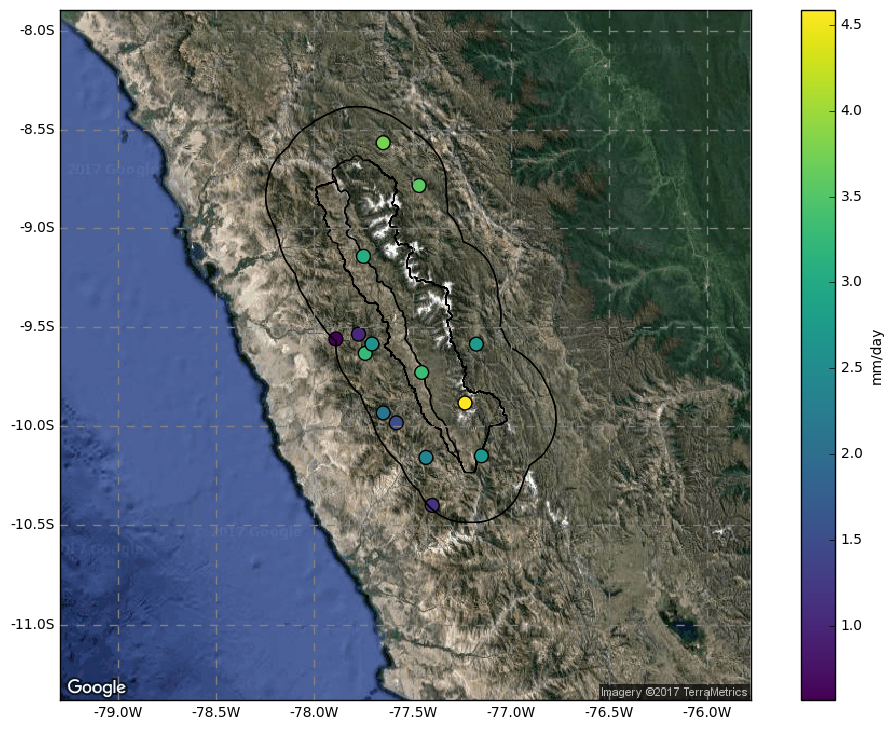

In [184]:
temp = meta_df.copy()
temp['mean'] = df.mean()
#txt = str(meta_df.NAME)
n = df[:0]

# plot the stations onto the google section
f, ax = plt.subplots(figsize=(10,10))

# the google static image is a standard rgb image
ggl_img = gm.get_vardata()

# make a map of the same size as the image (no country borders)
sm = Map(gm.grid, factor=1, countries=False)
sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_shapefile(fs)  # add the outlines
sm.set_geometry(poly_buf)  # add the outlines
sm.visualize(ax=ax)  # plot it

# read the station data and add them to the plot
dl = DataLevels(temp['mean'])   #, levels=np.arange(10, 91, 10))
x, y = sm.grid.transform(meta_df.LON.values, meta_df.LAT.values)
ax.scatter(x, y, color=dl.to_rgb(), s=100, edgecolors='k', linewidths=1)
#ax.annotate(meta_df.index, xy=(x,y))
dl.append_colorbar(ax, label='mm/day');

for i,xy in zip(x,y):
    ax.annotate(n[[i]], xy=xy, xycoords=xy)

In [187]:
282-370

-88

In [182]:
n[[0]]

,154108_RR


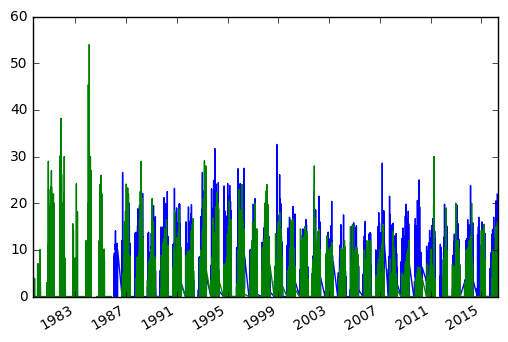

In [105]:
df['000445_RR'].plot();
df['000538_RR'].plot();

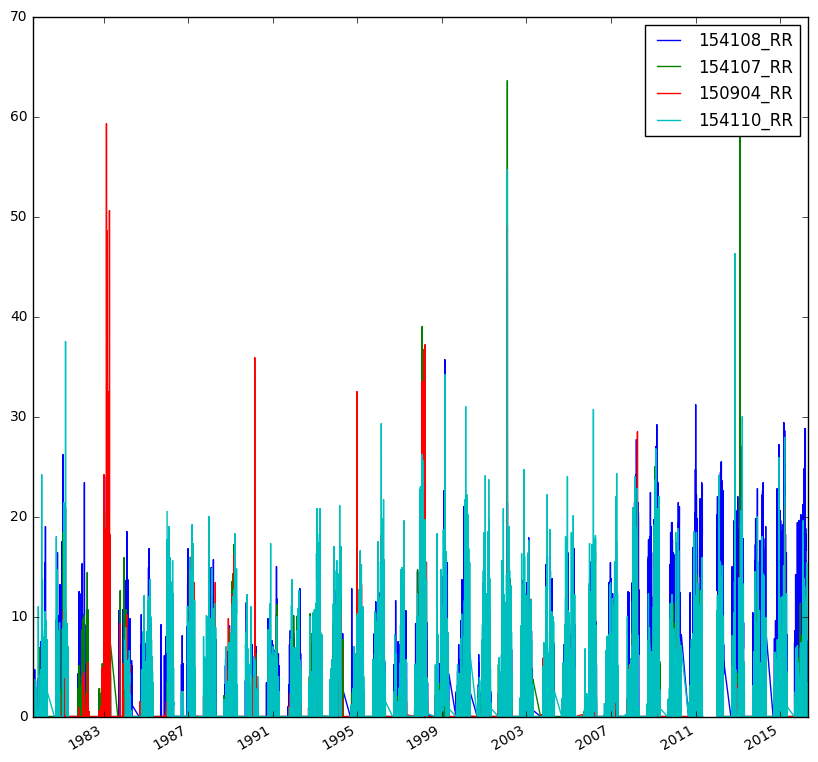

In [157]:
f = plt.subplots(figsize=(10,10))
df['154108_RR'].plot();
df['154107_RR'].plot();
df['150904_RR'].plot();
df['154110_RR'].plot();
plt.legend();

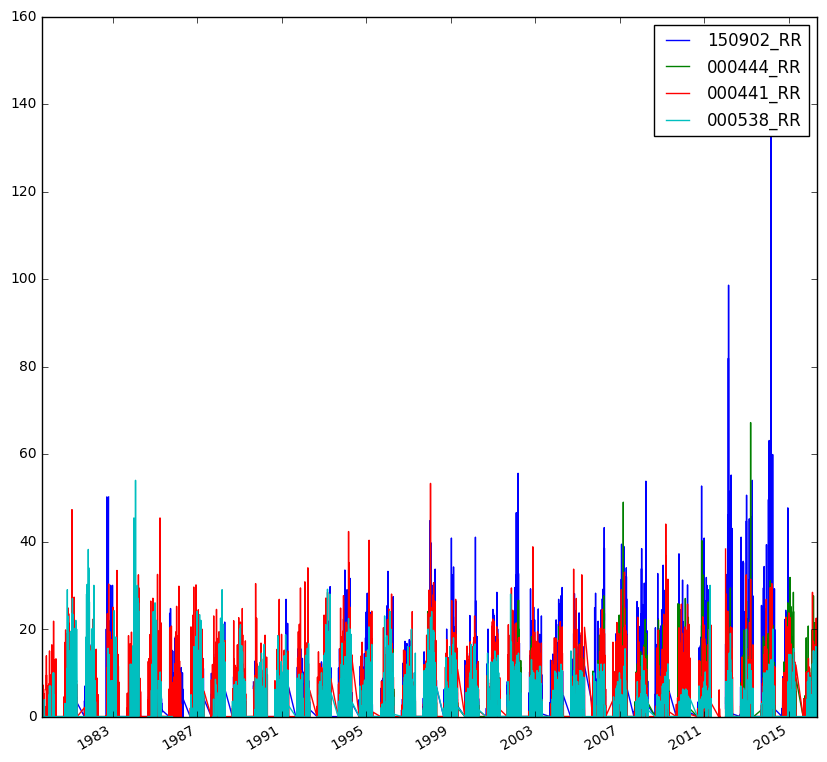

In [189]:
f = plt.subplots(figsize=(10,10))
df['150902_RR'].plot();
df['000444_RR'].plot();
df['000441_RR'].plot();
df['000538_RR'].plot();
plt.legend();